# Plot WRF inflow data

In [1]:
# Load the amrwind-frontend module
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/ascldap/users/lcheung/wind_uq/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os
for x in amrwindfedirs: sys.path.insert(1, x)

# Load the libraries
import amrwind_frontend  as amrwind
import matplotlib.pyplot as plt
import numpy             as np
import math
import postproamrwindsample as ppsample
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import pandas as pd

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
extractvar = lambda xrds, var, i : xrds[var][i,:].data.reshape(tuple(xrds.attrs['ijk_dims'][::-1]))

def setfigtextsize(ax, fsize):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label, ax.yaxis.get_offset_text()] + ax.get_xticklabels() + ax.get_yticklabels() ):
        item.set_fontsize(fsize)

## Load the AMR-Wind precursor profiles

In [3]:
# Start the AMR-Wind case
rundir = '/ccs/home/lcheung/scratch.cfd162/AWAKEN/UnstableABL1_precursor2'
case = amrwind.MyApp.init_nogui()
avgt=[16125, 17125]

Loading /ccs/home/lcheung/scratch.cfd162/AWAKEN/UnstableABL1_precursor2/./post_processing/abl_statistics00000.nc
Time range: 0.250000 to 3443.250000
Done.
ustar
Loading /ccs/home/lcheung/scratch.cfd162/AWAKEN/UnstableABL1_precursor2/./post_processing/abl_statistics12000.nc
Time range: 3000.250000 to 7146.000000
Done.
ustar
Loading /ccs/home/lcheung/scratch.cfd162/AWAKEN/UnstableABL1_precursor2/./post_processing/abl_statistics28500.nc
Time range: 7125.250000 to 11125.000000
Done.
ustar
Loading /ccs/home/lcheung/scratch.cfd162/AWAKEN/UnstableABL1_precursor2/./post_processing/abl_statistics44000.nc
Time range: 11000.250000 to 14948.500000
Done.
ustar
Loading /ccs/home/lcheung/scratch.cfd162/AWAKEN/UnstableABL1_precursor2/./post_processing/abl_statistics59500.nc
Time range: 14875.250000 to 18411.500000
Done.
ustar


Text(0, 0.5, 'Ustar [m/s]')

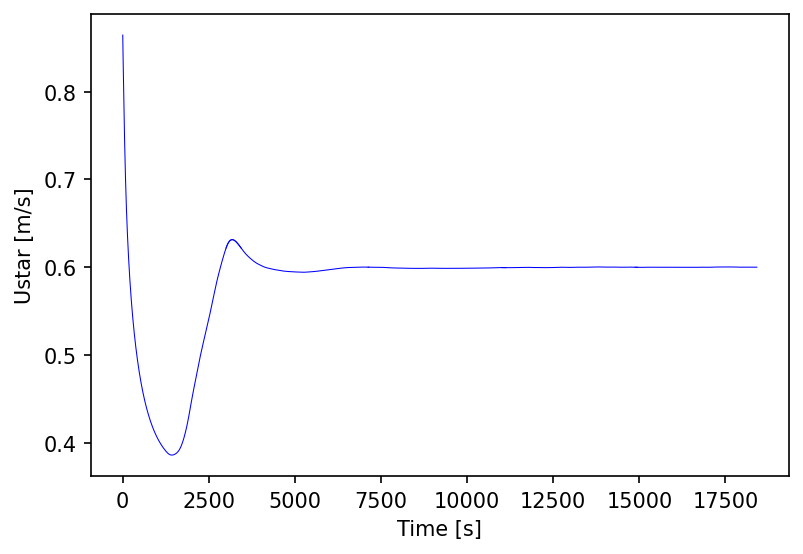

In [4]:
fig, ax = plt.subplots(figsize=(6,4), facecolor='w', dpi=150)

ablstatsfiles = ['./post_processing/abl_statistics00000.nc',
                 './post_processing/abl_statistics12000.nc',
                 './post_processing/abl_statistics28500.nc',
                 './post_processing/abl_statistics44000.nc',
                 './post_processing/abl_statistics59500.nc',
               ]
for f in ablstatsfiles:
    case.ABLpostpro_loadnetcdffile(rundir+'/'+f)
    data = case.ABLpostpro_plotscalars(ax=ax, plotvars=['ustar'], doplot=False)
    ax.plot(data['ustar']['t'], data['ustar']['data'], 'b-', lw=0.5)

#ax.set_ylim([0.55, 0.65])
ax.set_xlabel('Time [s]')
ax.set_ylabel('Ustar [m/s]')

## Plot the comparisons between the Sonde data profiles and AMR-Wind

In [5]:
profiledat='input_veloicty_temperature'
WRFprofiledat = np.loadtxt(profiledat, skiprows=1)

Loading u
Loading v
Loading w


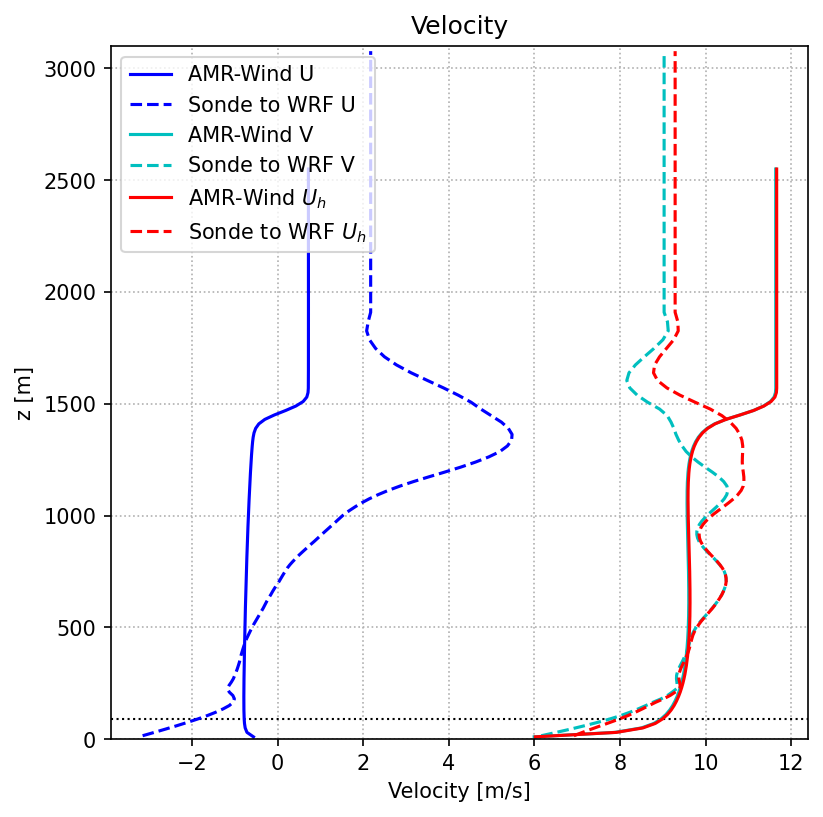

In [6]:
Uh=np.sqrt(WRFprofiledat[:,3]**2 + WRFprofiledat[:,4]**2)

fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)
Udat = case.ABLpostpro_plotprofiles(ax=ax, plotvars=['velocity', 'Uhoriz'], avgt=avgt, doplot=False)
ax.set_ylim([0, 3100])
ax.grid(ls=':')
ax.axhline(91, color='k', ls=':', lw=1)
ax.set_title('Velocity')
ax.set_xlabel('Velocity [m/s]')
ax.set_ylabel('z [m]')
#ax.set_ylim([0, 150])
ax.plot(Udat['u']['data'], Udat['u']['z'], 'b-', label='AMR-Wind U')
ax.plot(WRFprofiledat[:,3], WRFprofiledat[:,0], 'b--', label='Sonde to WRF U')

ax.plot(Udat['v']['data'], Udat['v']['z'], 'c-', label='AMR-Wind V')
ax.plot(WRFprofiledat[:,4], WRFprofiledat[:,0], 'c--', label='Sonde to WRF V')

ax.plot(Udat['Uhoriz']['data'], Udat['Uhoriz']['z'], 'r-', label='AMR-Wind $U_h$')
ax.plot(Uh, WRFprofiledat[:,0], 'r--', label='Sonde to WRF $U_h$')
ax.legend(loc='upper left')

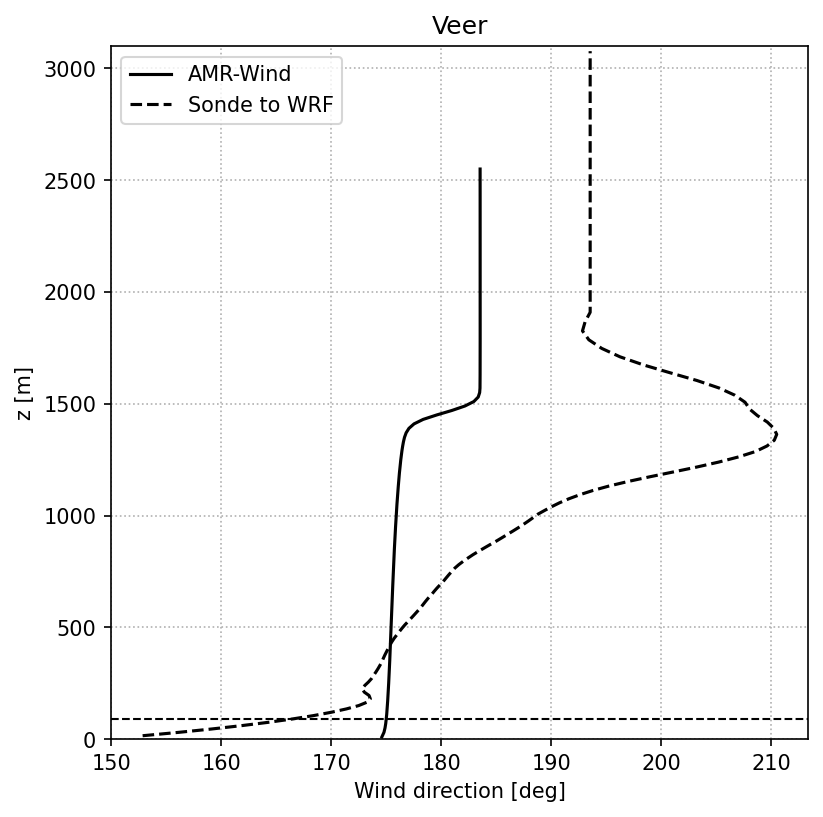

In [7]:
# Plot wind direction
winddir=270-np.arctan2(WRFprofiledat[:,4], WRFprofiledat[:,3])*180.0/math.pi

fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)
dirdat = case.ABLpostpro_plotprofiles(ax=ax, plotvars=['WindDir'], avgt=avgt, doplot=False)

ax.set_ylim([0, 3100])
ax.grid(ls=':')
ax.axhline(90, color='k', ls='--', lw=1)

ax.set_title('Veer')
ax.set_xlabel('Wind direction [deg]')
ax.set_ylabel('z [m]')
#ax.set_ylim([0, 150])
ax.plot(dirdat['WindDir']['data'],  dirdat['WindDir']['z'],     'k-', label='AMR-Wind')
ax.plot(winddir, WRFprofiledat[:,0], 'k--', label='Sonde to WRF')
ax.legend()

Loading theta


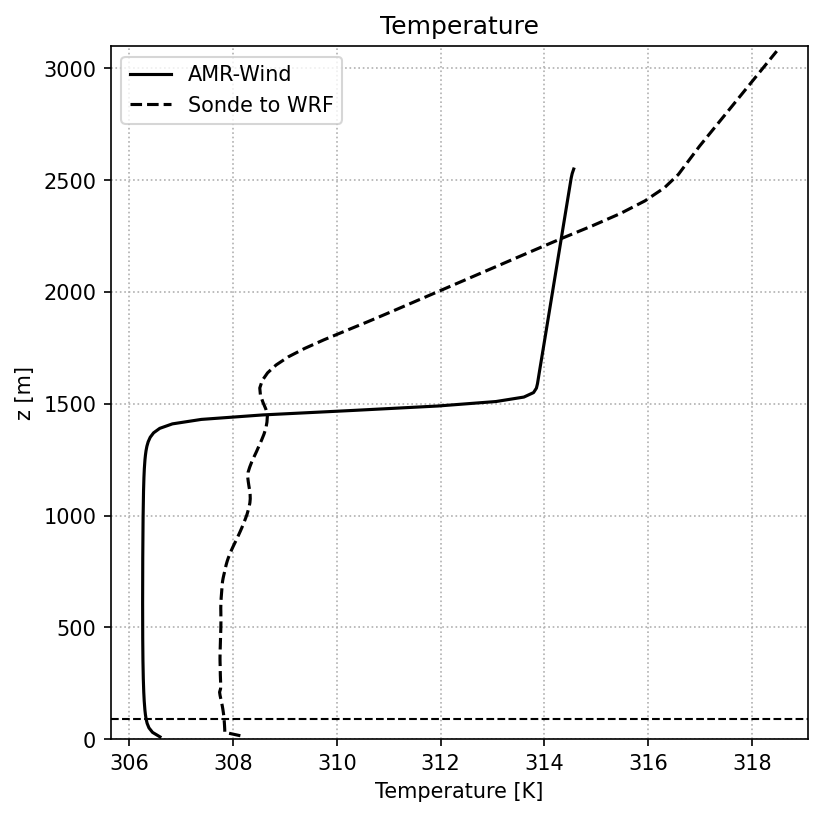

In [8]:
# Plot temperature
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)
Tdat = case.ABLpostpro_plotprofiles(ax=ax, plotvars=['Temperature'], avgt=avgt, doplot=False)
ax.set_ylim([0, 3100])
ax.grid(ls=':')
ax.axhline(90, color='k', ls='--', lw=1)
ax.set_title('Temperature')
ax.set_xlabel('Temperature [K]')
ax.set_ylabel('z [m]')
#ax.set_ylim([0, 150])
ax.plot(Tdat['T']['data'],  Tdat['T']['z'],     'k-', label='AMR-Wind')
ax.plot(WRFprofiledat[:,1], WRFprofiledat[:,0], 'k--', label='Sonde to WRF')
ax.legend()

## Plot some inflow planes from WRF

In [9]:
WRFncfile='XZ_VelocitySlice_UnstableConditions.nc'
groups=ppsample.getGroups(ppsample.loadDataset(WRFncfile))

In [10]:
WRFds=xr.open_dataset(WRFncfile) 

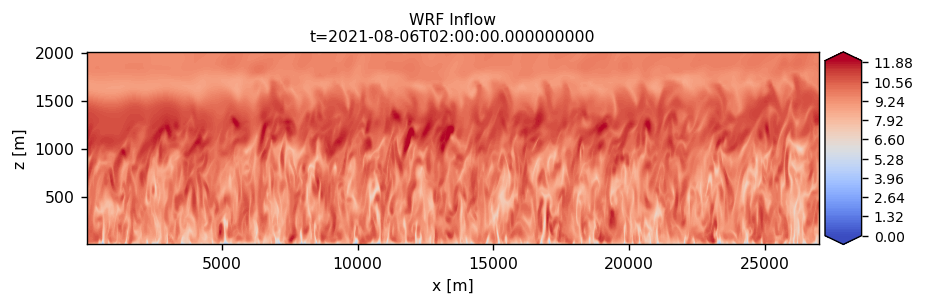

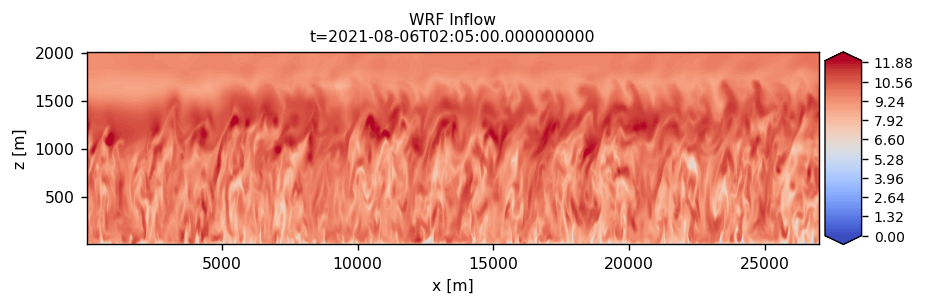

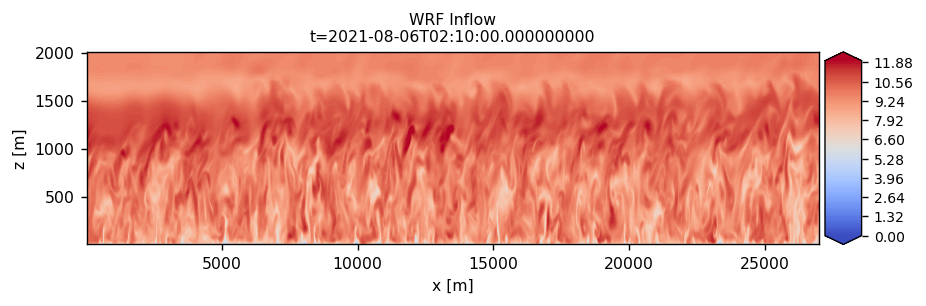

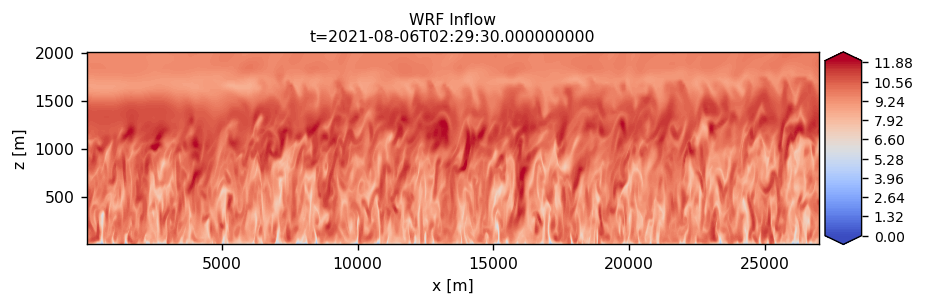

In [11]:
itimes=[0, 10, 20, 59]
for itime in itimes:
    fig, ax = plt.subplots(1,1,figsize=(8,2), dpi=125)
    Vh = np.sqrt(WRFds['U'][itime,:,:]**2 + WRFds['V'][itime,:,:]**2)
    c=ax.contourf(WRFds['X'], WRFds['Z'], Vh, levels=np.linspace(0,12,101),cmap='coolwarm', extend='both')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(c, ax=ax, cax=cax)
    cbar.ax.tick_params(labelsize=8) 
    
    ax.set_xlabel('x [m]')
    ax.set_ylabel('z [m]')
    ax.set_title('WRF Inflow\nt=%s'%WRFds['Time'][itime].data)
    setfigtextsize(ax, 9)
#ax.set_ylim([0,500])
#ax.set_xlim([0,3000])
#plt.colorbar()

## Plot the comparisons between the WRF inflow profiles and AMR-Wind ABL profiles

Text(0, 0.5, 'z [m]')

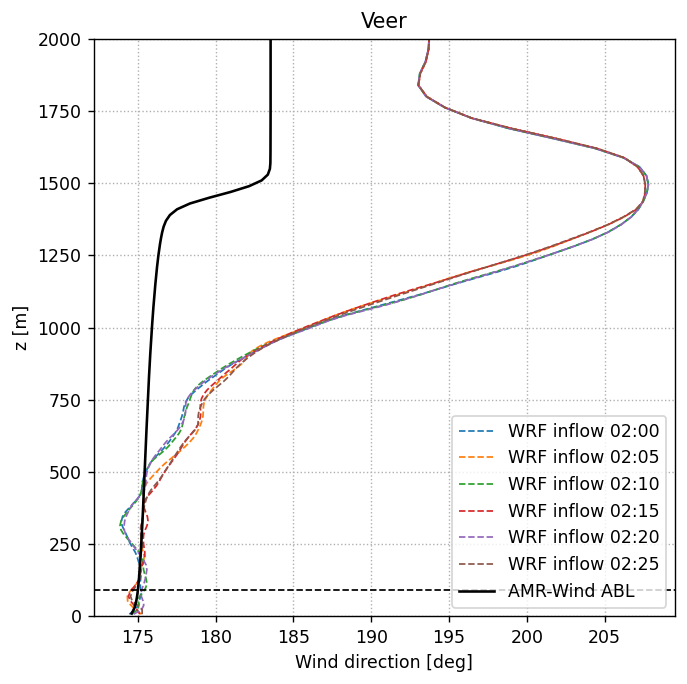

In [12]:
itimes=[0, 10, 20, 30, 40, 50]
fig, ax = plt.subplots(1,1,figsize=(6,6), dpi=125)
for itime in itimes:
    #Vh = np.sqrt(WRFds['U'][itime,:,:]**2 + WRFds['V'][itime,:,:]**2)
    t=pd.Timestamp(WRFds['Time'][itime].data)
    winddir=270-np.arctan2(WRFds['V'][itime,:,:], WRFds['U'][itime,:,:])*180.0/math.pi
    veerprof = np.mean(winddir, axis=1)
    ax.plot(veerprof, WRFds['Z'], lw=1, ls='--', label='WRF inflow %02i:%02i'%(t.hour, t.minute))
    
ax.plot(dirdat['WindDir']['data'],  dirdat['WindDir']['z'],  'k-', label='AMR-Wind ABL')
ax.legend()
ax.grid(ls=':')
ax.axhline(90, color='k', ls='--', lw=1)
ax.set_ylim([0, 2000])

ax.set_title('Veer')
ax.set_xlabel('Wind direction [deg]')
ax.set_ylabel('z [m]')

Text(0, 0.5, 'z [m]')

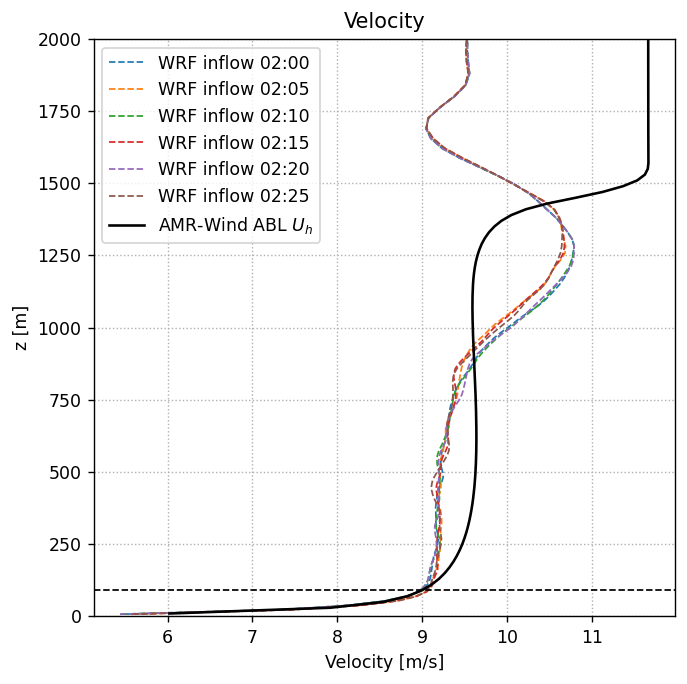

In [13]:
itimes=[0, 10, 20, 30, 40, 50]
fig, ax = plt.subplots(1,1,figsize=(6,6), dpi=125)
for itime in itimes:
    t=pd.Timestamp(WRFds['Time'][itime].data)
    Vh = np.sqrt(WRFds['U'][itime,:,:]**2 + WRFds['V'][itime,:,:]**2)
    #winddir=270-np.arctan2(WRFds['V'][itime,:,:], WRFds['U'][itime,:,:])*180.0/math.pi
    Vhprof = np.mean(Vh, axis=1)
    ax.plot(Vhprof, WRFds['Z'], lw=1, ls='--', label='WRF inflow %02i:%02i'%(t.hour, t.minute))
ax.plot(Udat['Uhoriz']['data'], Udat['Uhoriz']['z'], 'k-', label='AMR-Wind ABL $U_h$')
ax.legend()
ax.grid(ls=':')
ax.axhline(90, color='k', ls='--', lw=1)
ax.set_ylim([0, 2000])

ax.set_title('Velocity')
ax.set_xlabel('Velocity [m/s]')
ax.set_ylabel('z [m]')

Text(0, 0.5, 'z [m]')

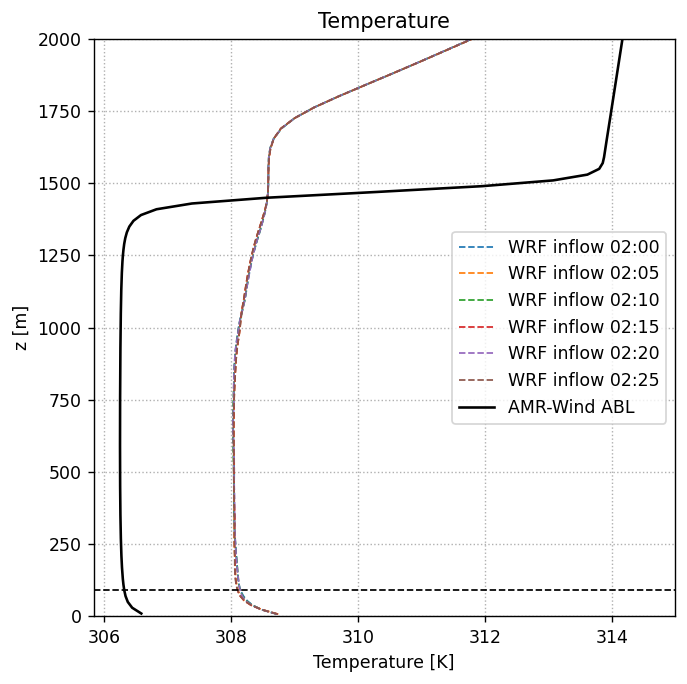

In [14]:
itimes=[0, 10, 20, 30, 40, 50]
fig, ax = plt.subplots(1,1,figsize=(6,6), dpi=125)
for itime in itimes:
    #Vh = np.sqrt(WRFds['U'][itime,:,:]**2 + WRFds['V'][itime,:,:]**2)
    #winddir=270-np.arctan2(WRFds['V'][itime,:,:], WRFds['U'][itime,:,:])*180.0/math.pi
    t=pd.Timestamp(WRFds['Time'][itime].data)
    Tprof = np.mean(WRFds['T'][itime,:,:], axis=1)
    ax.plot(Tprof, WRFds['Z'], lw=1, ls='--', label='WRF inflow %02i:%02i'%(t.hour, t.minute))
    
ax.plot(Tdat['T']['data'],  Tdat['T']['z'],     'k-', label='AMR-Wind ABL')
ax.legend()
ax.grid(ls=':')
ax.axhline(90, color='k', ls='--', lw=1)
ax.set_ylim([0, 2000])
ax.set_title('Temperature')
ax.set_xlabel('Temperature [K]')
ax.set_ylabel('z [m]')

In [15]:
# Load the AMR-Wind inflow profile
noturbdir='/gpfs/alpine/cfd162/scratch/lcheung/AWAKEN/UnstableABL1_farmrun1_noturbs/post_processing/'
ncfile= 'KP_inflow1_64500.nc'
kplot=0
groups= ppsample.getGroups(ppsample.loadDataset(noturbdir+ncfile))
AMRds = xr.open_dataset(noturbdir+'/'+ncfile, group=groups[0]) 

xm = AMRds['coordinates'].data[:,0].reshape(tuple(AMRds.attrs['ijk_dims'][::-1]))
ym = AMRds['coordinates'].data[:,1].reshape(tuple(AMRds.attrs['ijk_dims'][::-1]))
zm = AMRds['coordinates'].data[:,2].reshape(tuple(AMRds.attrs['ijk_dims'][::-1]))
dtime=xr.open_dataset(noturbdir+'/'+ncfile)
AMRds = AMRds.assign_coords(coords={'xm':(['x','y'], xm[kplot,:,:]),
                                    'ym':(['x','y'], ym[kplot,:,:]),
                                    'zm':(['x','y'], zm[kplot,:,:]),
                                    'time':dtime['time'],
                                   })
dtime.close()

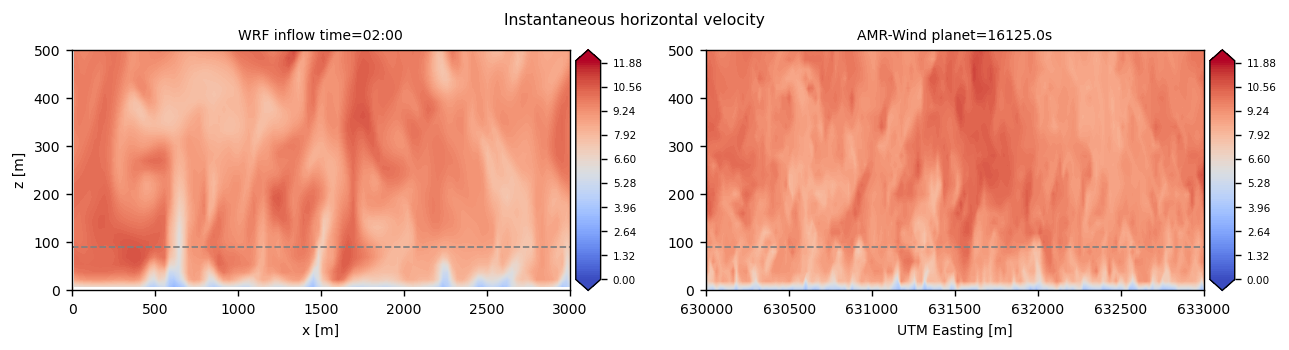

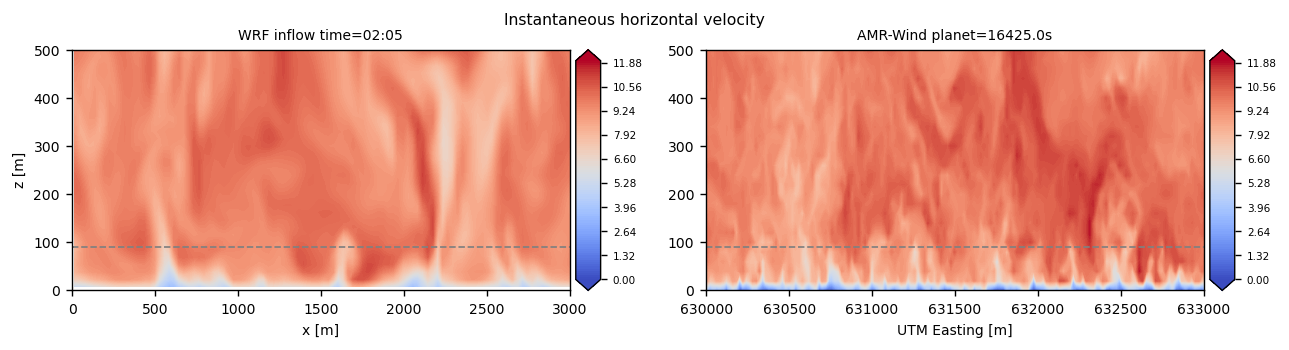

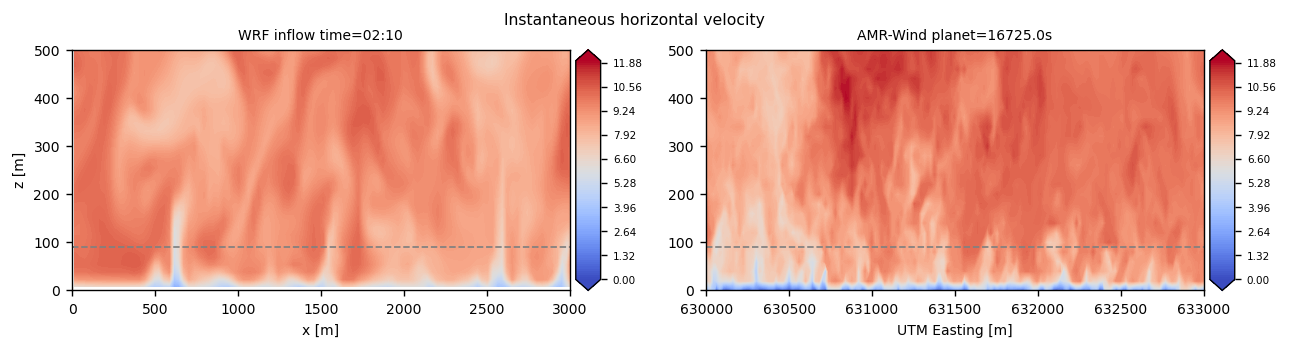

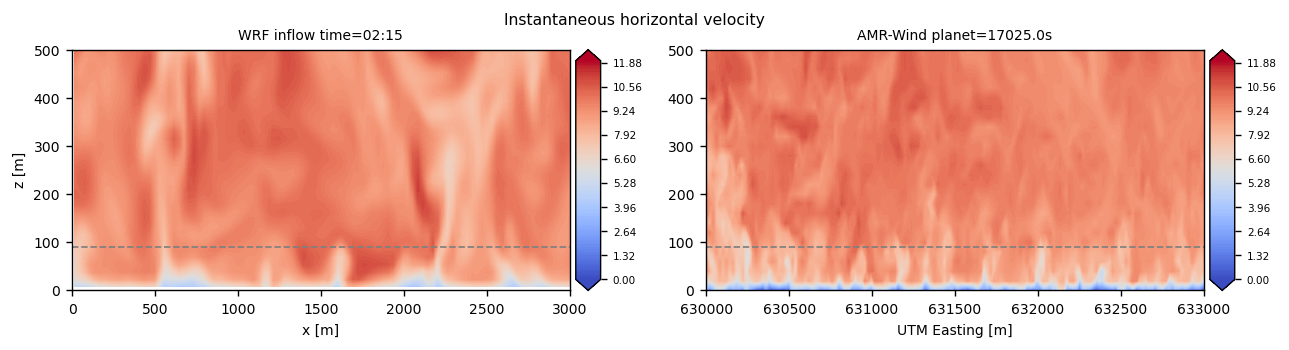

In [16]:
# Make a series of plots
plottimes=[[0, 0],
           [10, 300],
           [20, 600],
           [30, 900],
          ]
clevels=np.linspace(0,12,101)
fontsize=8
zhh=90

for ptimes in plottimes:
    fig, axs = plt.subplots(1,2,figsize=(12,2.5), dpi=125)
    
    # Plot the WRF inflow
    itime=ptimes[0]
    ax   = axs[0]
    t=pd.Timestamp(WRFds['Time'][itime].data)
    Vh = np.sqrt(WRFds['U'][itime,:,:]**2 + WRFds['V'][itime,:,:]**2)
    c=ax.contourf(WRFds['X'], WRFds['Z'], Vh, levels=clevels,cmap='coolwarm', extend='both')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(c, ax=ax, cax=cax)
    cbar.ax.tick_params(labelsize=fontsize-2)    
    ax.set_ylim([0,500])
    ax.set_xlim([0,3000])
    ax.set_title('WRF inflow time=%02i:%02i'%(t.hour, t.minute))
    ax.set_xlabel('x [m]')
    ax.set_ylabel('z [m]')
    ax.axhline(zhh, color='gray', ls='--', lw=1)
    setfigtextsize(ax, fontsize)
    
    # Plot the AMR-Wind slice
    itime = ptimes[1]
    ax    = axs[1]
    vy = extractvar(AMRds, 'velocityy', itime)
    vx = extractvar(AMRds, 'velocityx', itime)
    vz = extractvar(AMRds, 'velocityz', itime)
    vh = np.sqrt(vx**2 + vy**2)
    c=ax.contourf(AMRds['xm'], AMRds['zm'], vh[kplot,:,:], levels=clevels, cmap='coolwarm', extend='both')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(c, ax=ax, cax=cax)
    cbar.ax.tick_params(labelsize=fontsize-2)
    ax.set_ylim([0,500])
    ax.set_xlim([630000, 630000+3000])
    ax.set_title('AMR-Wind planet=%0.1fs'%AMRds['time'][itime].data)
    ax.set_xlabel('UTM Easting [m]')
    ax.axhline(zhh, color='gray', ls='--', lw=1)
    setfigtextsize(ax, fontsize)
    
    # Set the title
    fig.suptitle('Instantaneous horizontal velocity', y=1.0, fontsize =fontsize+1)